# Análisis de Regresion de Costos de Viviendas.

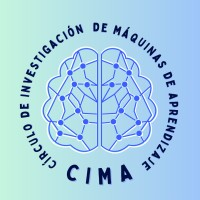

## Descripción del Conjunto de Datos de Boston Housing:
**Propósito:** Predecir el valor mediano de las casas en varios suburbios de Boston.

**Variables:** Contiene 13 características explicativas y una variable objetivo (el valor mediano de las casas, en miles de dólares).

**Características:**

1. CRIM: Tasa de criminalidad per cápita por ciudad.
2. ZN: Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
3. INDUS: Proporción de acres de negocios no minoristas por ciudad.
4. CHAS: Variable ficticia (dummy) del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario).
5. NOX: Concentración de óxidos de nitrógeno (partes por 10 millones).
6. RM: Número medio de habitaciones por vivienda.
7. AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
8. DIS: Distancias ponderadas a cinco centros de empleo de Boston.
9. RAD: Índice de accesibilidad a carreteras radiales.
10. TAX: Tasa de impuesto a la propiedad de valor total por $10,000.
11. PTRATIO: Proporción alumno-maestro por ciudad.
12. B: 1000(𝐵𝑘−0.63) donde 𝐵𝑘 es la proporción de residentes de raza negra por ciudad.
13. LSTAT: Porcentaje de la población de bajo estatus.

**Variable Objetivo:**

14. MEDV: Valor mediano de las casas ocupadas por sus propietarios, en miles de dólares.

## Importando Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

## Lectura de datos

In [ ]:
datos=pd.read_csv("BostonHousing.csv")
datos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Análisis de datos

### Preprocesamiento
Busqueda datos NA.

In [ ]:
datos.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


Existen 5 datos NA en la variable rm, tenemoss dos opciones: Eliminar es las filas correspondientes a loss datos NA o imputar los NA.


### Imputación

In [ ]:
## Imputación

from sklearn.impute import SimpleImputer

# Crear un imputador que reemplace los NaN con la media
imputer = SimpleImputer(strategy='median')

# Seleccionar solo la columna 'rm'
rm_values = datos[['rm']]

# Imputar los valores faltantes
datos['rm'] = imputer.fit_transform(rm_values)

In [ ]:
datos.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


### Visualización de la data

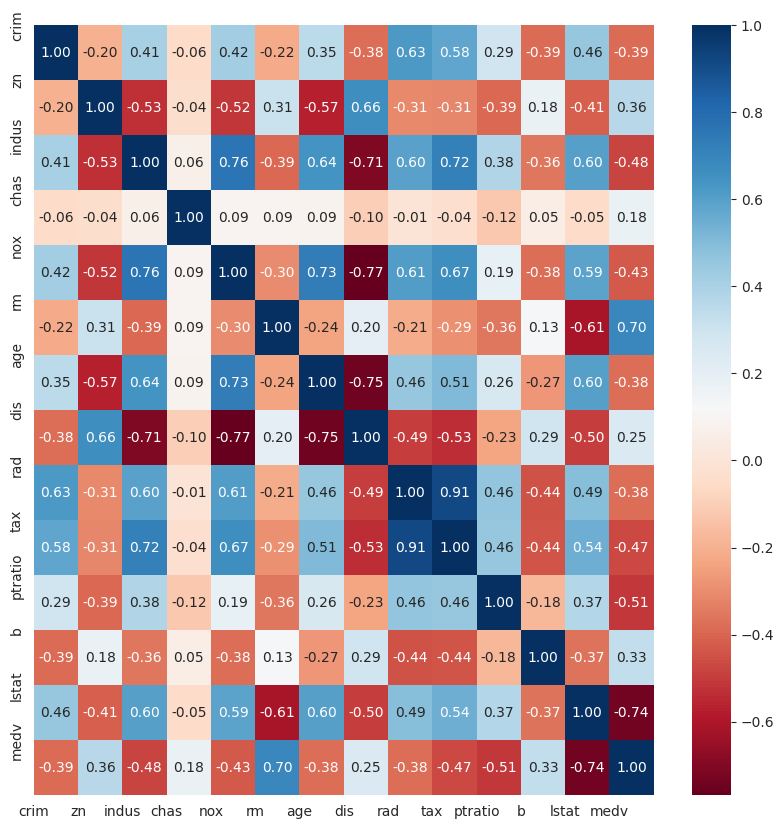

In [ ]:
## Correlación de variables
corr = datos.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


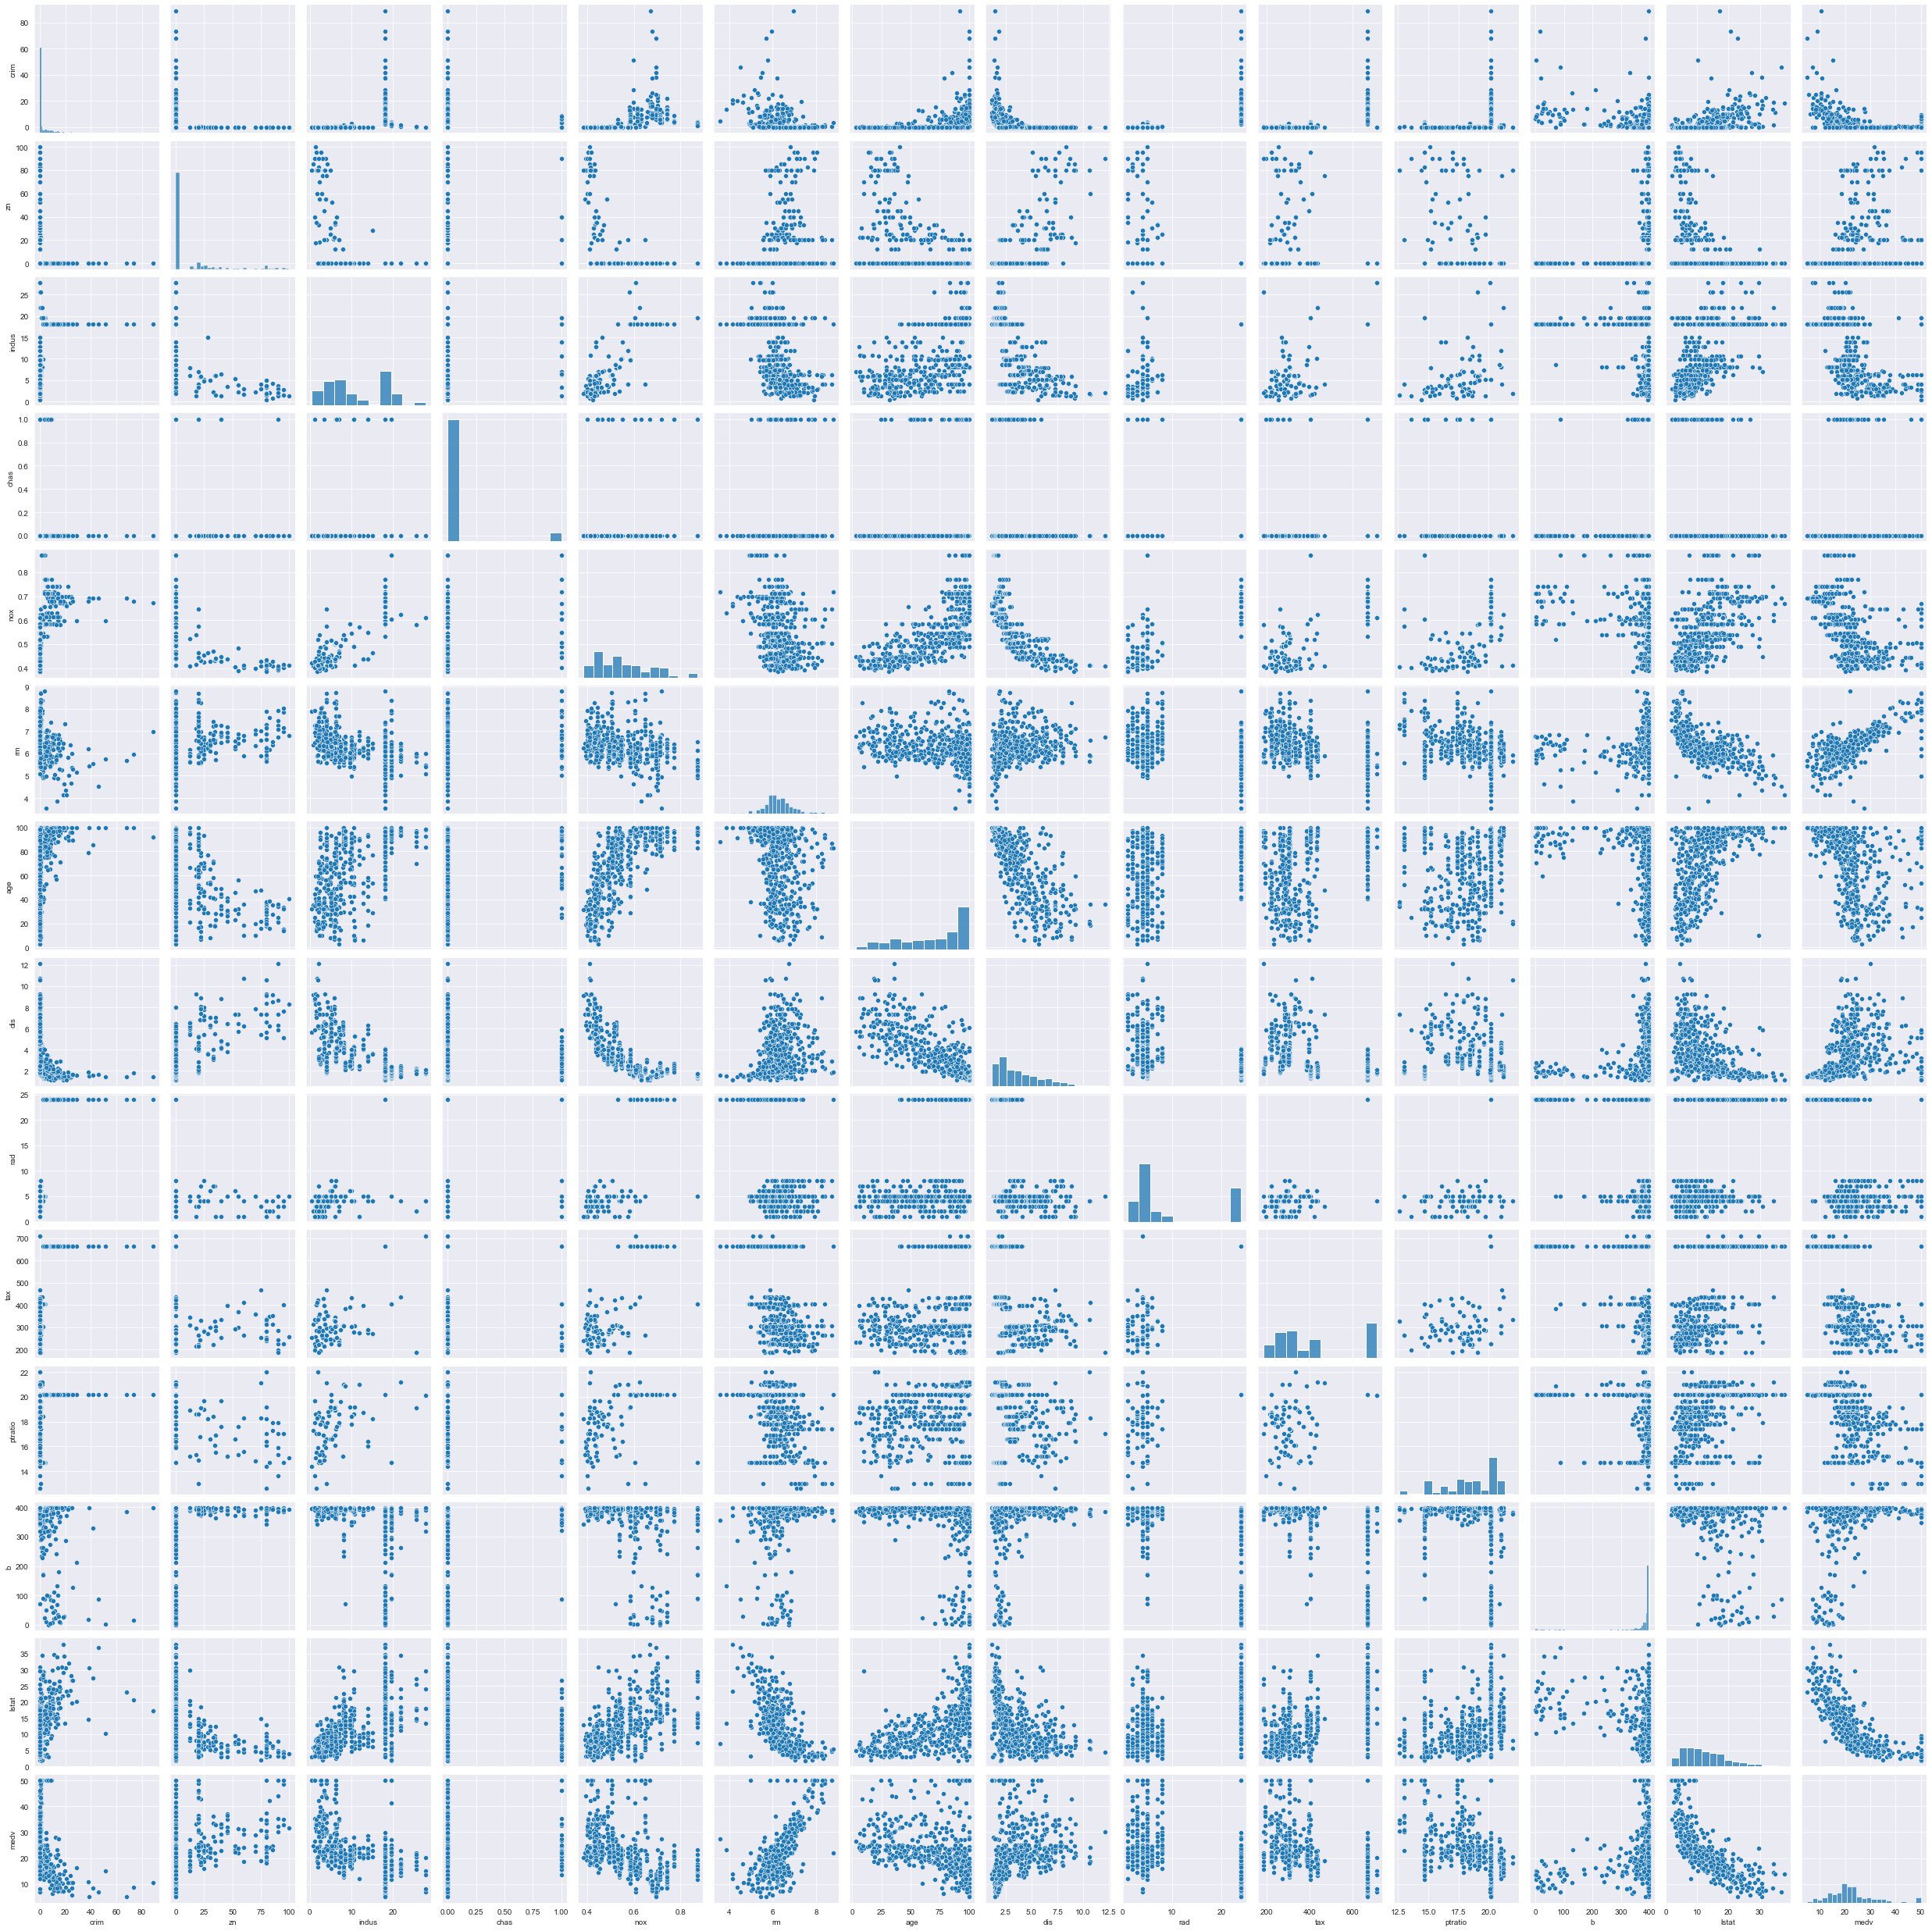

In [ ]:
sns.pairplot(datos)
plt.show()

### Regresión Ridge

In [ ]:
X=datos.drop("medv",axis=1)
y=datos['medv']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354,)
Shape of y_test (152,)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

### Validación Cruzada

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7654157784649791
R2_score (train):  0.9227218941821587
R2_score (test):  0.8900180368649822
RMSE:  2.878661804949894


### Nuevos datos

In [ ]:
nuevos_datos = np.array([[0.02100, 10.0, 5.00, 0, 0.450, 6.200, 50.0, 5.0000, 2, 300, 14.0, 396.90, 8.00]])
# Hacer la predicción
predicciones_nuevos_datos=ridge_pipe.predict(nuevos_datos)

# Imprimir las predicciones
print("Predicciones para nuevos datos:", predicciones_nuevos_datos)

Predicciones para nuevos datos: [21.89568752]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
